# Understanding the problem  statement - Factors 

## Importing important libraries

In [988]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [989]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score

## Loading dataset

In [990]:
bikes = pd.read_csv('day.csv')
#Inspecting above few rows 
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [991]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Given dataset contains 730 rows and 16 column
#### Having no null values

In [992]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [993]:
#checking for unique values
bikes.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [994]:
bikes.size

11680

In [995]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [996]:
#Checking dimension of data
bikes.ndim

2

In [997]:
#checking column names
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Cleaning and Exploratory analysis

### Dropping columns having no importance in regards to this analysis

Dropping column -  "Instant" as it contains only row instances which is of no importance    
Dropping column - "dteday" as we have this information already in other columns and day to day trend will not a be good analysis  
Dropping column - "casual" and "registered" as they are related to the target variable so this will strongly impact the analysis

In [998]:
bikes.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace= True)

In [999]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Mapping the columns(categorical) with more than 2 values to their corresponding terms for what they meant for better understanding

In [1000]:
#Mapping the season column
bikes.season = bikes.season.map({1:"spring",2:"summer",3 : "fall", 4: "winter"})

In [1001]:
#Mapping the month 
bikes.mnth = bikes.mnth.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"june",7:"july",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

In [1002]:
#Mapping the weekday
bikes.weekday = bikes.weekday.map({0: "sun" ,1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"})

In [1003]:
#Mapping the weathersit
bikes.weathersit = bikes.weathersit.map({1:"clear",2:"mist",3:"light_rain",4:"heavy_rain"})

In [1004]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [1005]:
#Rechecking dtype and null values
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1006]:
#Checking number of unique values of columns to differ continous variables
bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Univariate analysis

#### Continuous variables

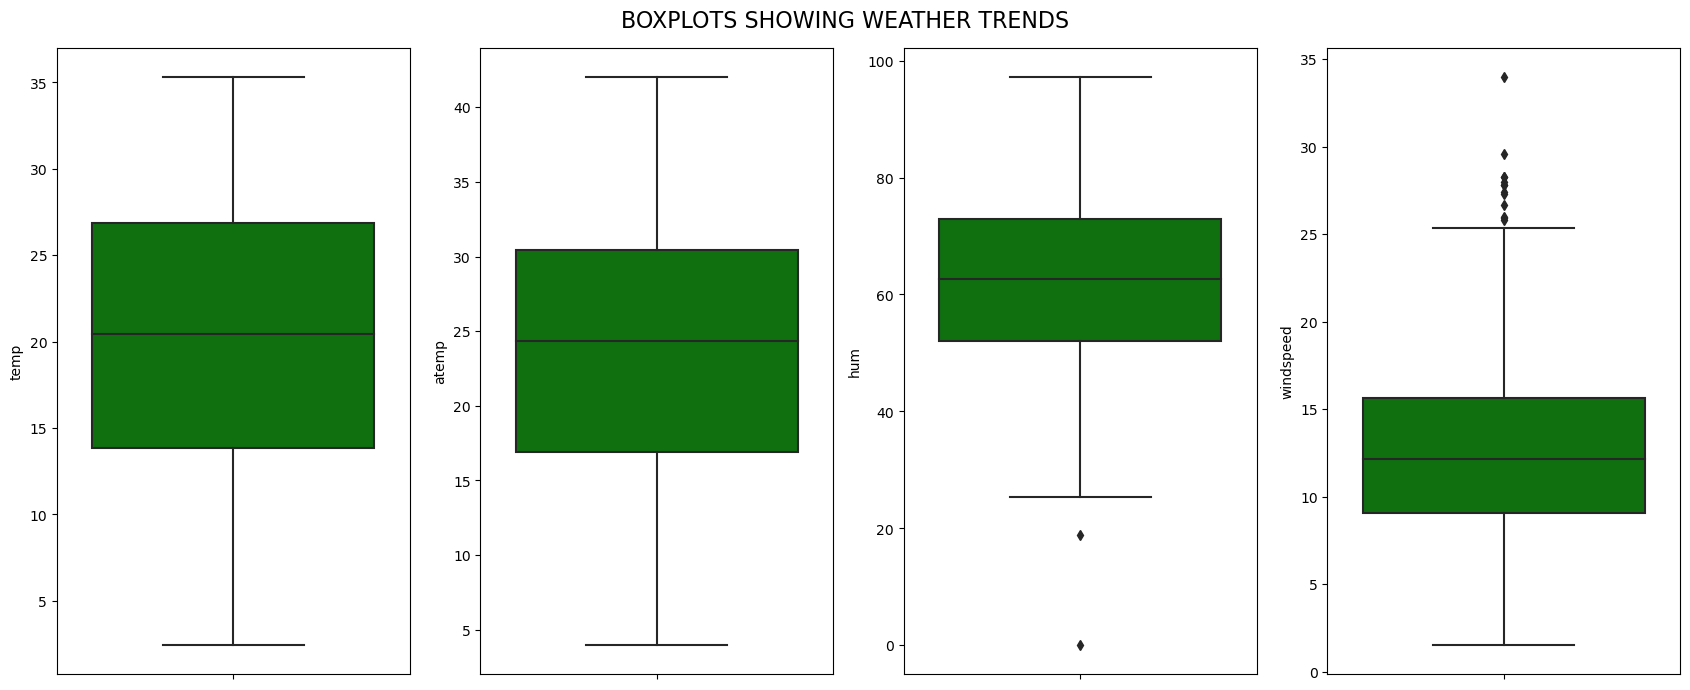

In [1007]:
#Checking for outliers in continuous variables
plt.figure(figsize=(17,7))
col = ["temp","atemp","hum","windspeed"]
n = 1
for i in col:
    plt.subplot(1,4,n)
    sns.boxplot(y= i,data = bikes, color = "green" )
    n+=1
plt.suptitle("BOXPLOTS SHOWING WEATHER TRENDS", fontsize = 16)
plt.tight_layout()
plt.show()

#### Atemp, temp almost appear to be normal distributed while windspeed and hum has some outliers

### Categorical independent variables

In [1008]:
#Creating list of categorical variables
cat_vars = ["season","yr","mnth","holiday","weekday","workingday", "weathersit"]

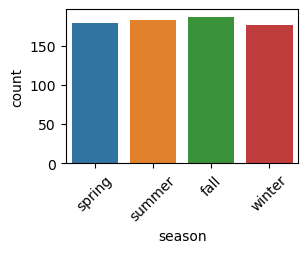

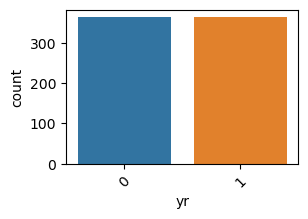

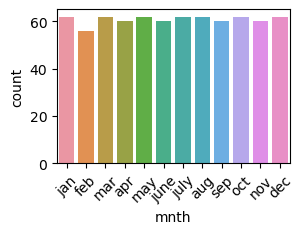

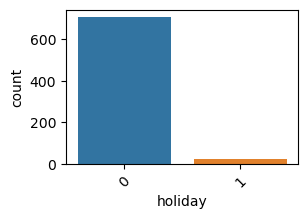

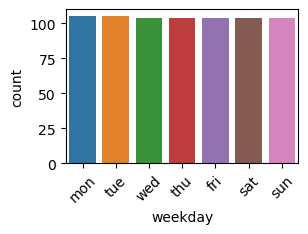

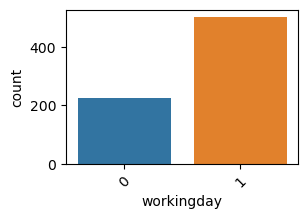

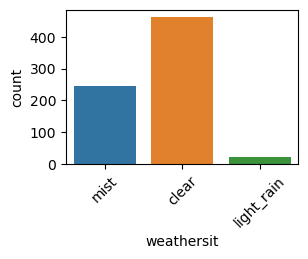

In [1009]:
for i in cat_vars:
    plt.figure(figsize = (3,2))
    sns.countplot(x = i, data = bikes)
    plt.xticks(rotation=45)
    plt.show()

- Weathersit only shows 3 types of weathers. No heavy rain occured on any single day.
- Further analysis will be done when we plot cnt(Target variable) along these independent variables

### Bivariate analysis

### Checking linear relationship between continuous variables

<Figure size 1400x2800 with 0 Axes>

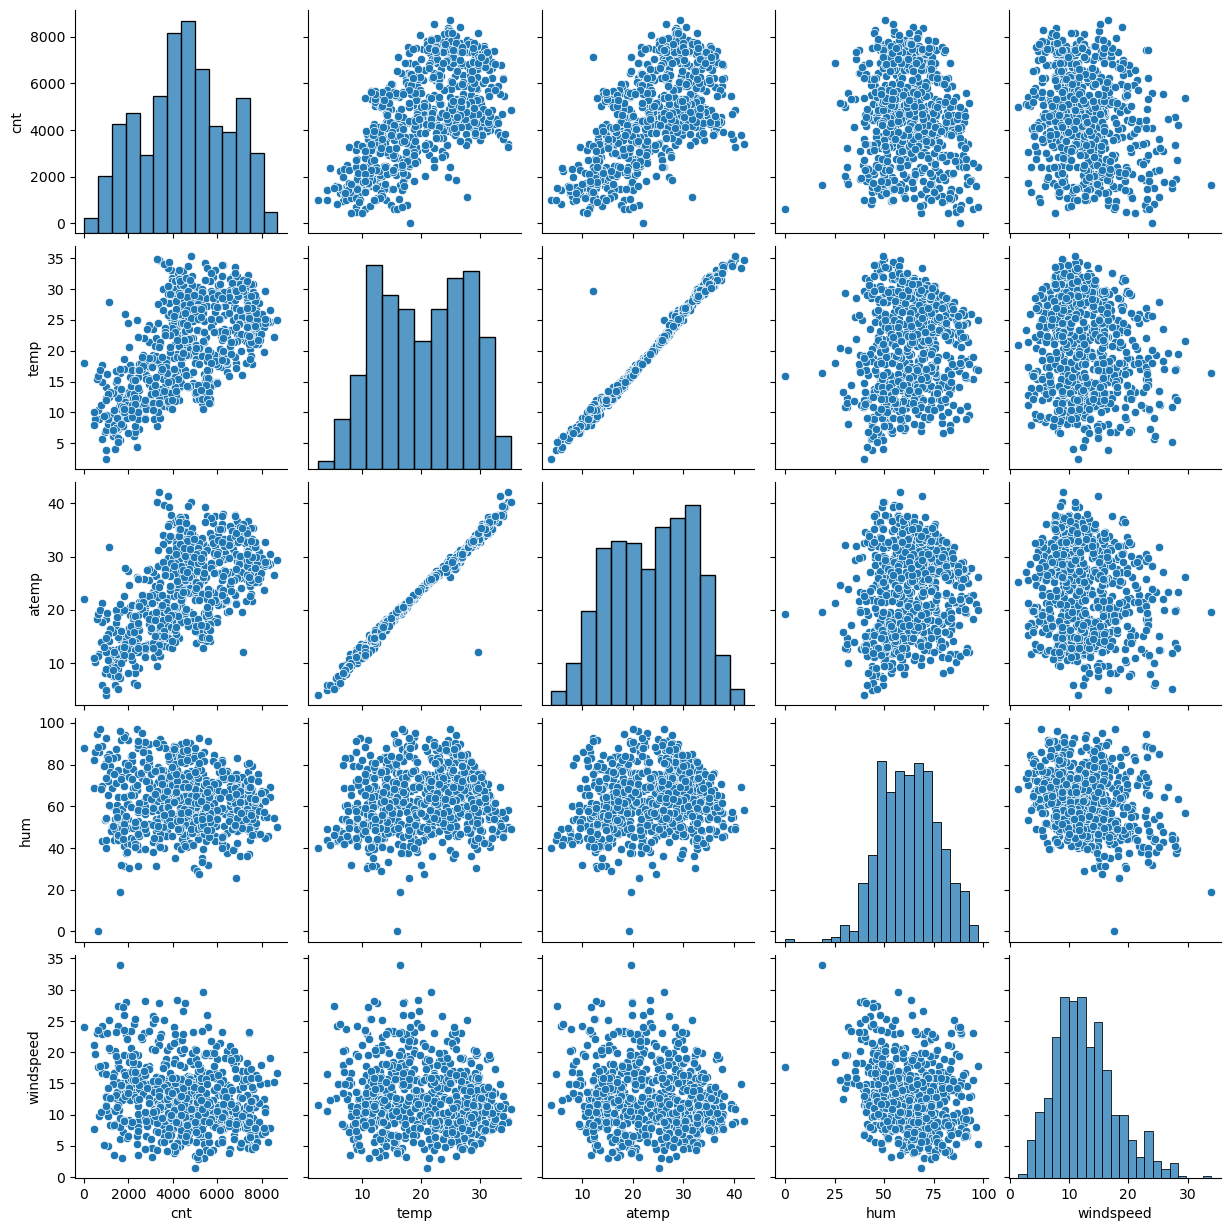

In [1010]:
plt.figure(figsize = (14,28))
sns.pairplot(data=bikes,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Inference 
 Temp and atemp are highly correlated with each other. <br>
 cnt (Target variable)/Bike demand having higher degree of linear with temp and atemp. <br>
 cnt(Target variable) historgram is showing normal distribution through visualization.
 

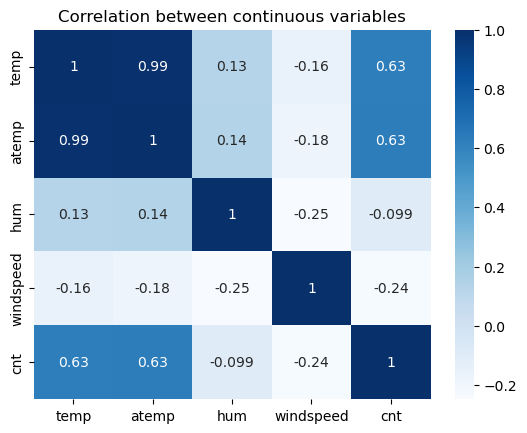

In [1011]:
#Checking continuous variables relationship with each other
sns.heatmap(bikes[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='Blues', annot = True)
plt.title("Correlation between continuous variables")
plt.show()


#### temp and atemp having correlation of  0.99 ~ highly/strongly correlated

### Relationship of categorical independent variables with target variable (cnt)

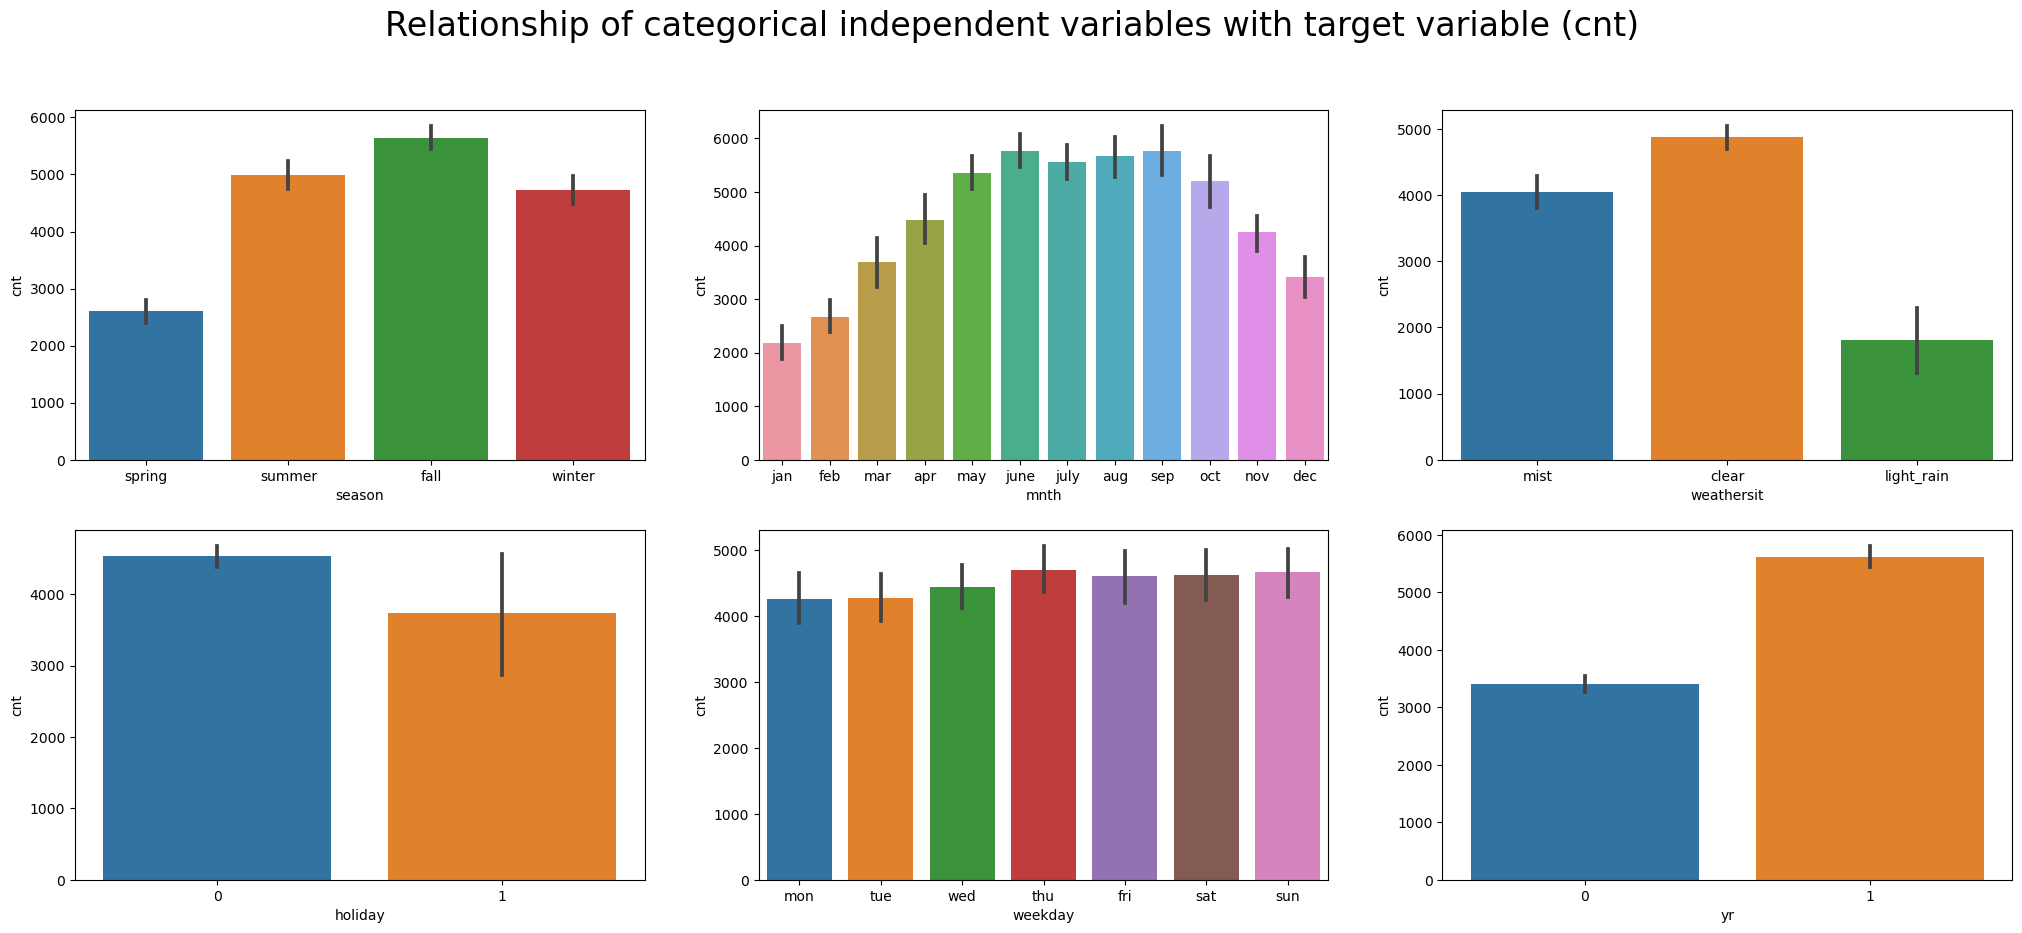

In [1012]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.barplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.barplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.barplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.barplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.barplot(x = 'yr', y = 'cnt', data = bikes)
plt.suptitle("Relationship of categorical independent variables with target variable (cnt)",fontsize = 24)
plt.show()


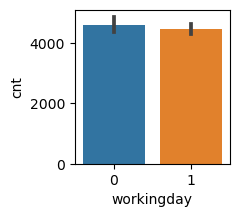

In [1013]:
plt.figure(figsize =(2,2))
sns.barplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

### Insights


- Fall season has highest demand for bookbikes.
- Demand for bikes continuously growing each month till June. 
- After September, demand is decreasing.
- The clear weathershit has highest demand for bikes.
- Significant increase in demand of bikes from 2018-2019.
- Thursday through Sunday are the busiest days for bookings..
- On holiday, demand has decreased in comparison to weekdays.
- Demand is lesser on working day.

## Using Multiple Regression for model development

In [1014]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy variables

In [1015]:
# Dummy variable creation for month, weekday, weathersit and season variables.
season_bikes=pd.get_dummies(bikes.season,drop_first=True)
mnth_bikes=pd.get_dummies(bikes.mnth,drop_first=True)
weekdays_bikes=pd.get_dummies(bikes.weekday,drop_first=True)
weathersit_bikes=pd.get_dummies(bikes.weathersit,drop_first = True)

In [1016]:
bikes_new = pd.concat([bikes,season_bikes,mnth_bikes,weekdays_bikes,weathersit_bikes],axis = 1)

In [1017]:
bikes_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'light_rain', 'mist'],
      dtype='object')

In [1018]:
bikes_new.shape

(730, 34)

In [1019]:
bikes_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [1020]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  aug         730 non-null    uint8  
 16  dec         730 non-null    uint8  
 17  feb         730 non-null    uint8  
 18  jan         730 non-null    uint8  
 19  july        730 non-null    u

In [1021]:
#Dropping unnecessary columns 
bikes_new.shape

(730, 34)

In [1022]:
bikes_new.drop(["season","weathersit","mnth", "weekday"],axis =1, inplace = True)

In [1023]:
bikes_new.shape

(730, 30)

## Train and test split of data

In [1024]:
#Train and test split with 70:30 ratio

np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes_new, train_size = 0.7, random_state = 100)

In [1025]:
print(bikes_train.shape)

(510, 30)


In [1026]:
print(bikes_test.shape)

(220, 30)


### Feature scaling

In [1027]:
#Normalizing the data using MinMaxScaler
#Creating a scaler instance
scaler = MinMaxScaler()

In [1028]:
#Applying scaler to all numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
#Fit and transform training set only
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])

In [1029]:
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [1030]:
#Inspecting stats from Training set after scaling
bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building a model using RFE approach

##### Using RFE to eliminate columns

In [1031]:
#Target variable y
y_train = bikes_train.pop('cnt')
#ALl independent variables
X_train = bikes_train

In [1032]:
#Build a linear regression using sklearn for RFE

lm = LinearRegression()
#fit
lm.fit(X_train,y_train)

LinearRegression()

In [1033]:
#Cut down of features to 15 using automated approach
num_features_to_select = 15
rfe = RFE(estimator = lm,n_features_to_select = num_features_to_select)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1034]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('light_rain', True, 1),
 ('mist', True, 1)]

#### Observations:
- Above are the results given by RFE function to retain top 15 feaures.

In [1035]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_rain', 'mist'],
      dtype='object')


In [1036]:
#Rejected columns 
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [1037]:
#Calling a function to calculate VIF(Variance Inflation factor)
def calVIF(df):
    df = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [1038]:
# Dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1039]:
# calculate VIF of selected variabes
calVIF(X_train_rfe)


,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,mist,2.32
0,yr,2.09
11,nov,1.85
9,jan,1.75


#### Hum has the highest VIF .Hum and temp has high VIF value >5 ####

### Building a linear model

In [1040]:
def model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [1041]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_rain', 'mist'],
      dtype='object')

#### Model 1

In [1042]:
#Building 1st linear regression model 
model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          8.15e-189
Time:                        17:53:53   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

#### Observations:
- VIF of hum and temp is high.
- p-values of all features are in acceptable limit. So, not possible to decide which to be dropped based on p-values.
- So, dropping hum based of its highest VIF value and will look further on VIF's

#### Model 2

In [1043]:
# As humidity showed highest VIF value so dropping it
col = ['yr', 'holiday', 'temp','windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_rain', 'mist']
model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          4.75e-186
Time:                        17:53:53   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

##### Now VIF seems to be somewhat good however temp VIF is still >5

In [1044]:
calVIF(col)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,nov,1.81
8,jan,1.66
9,july,1.59
13,mist,1.57


- VIF value of temp is dropped but stil higher than valid limit, showing high collinearity.
- R-square and adjusted R-square value show slight decline

#### Model 3

In [1045]:
# dropping summer feature
col = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_rain', 'mist']
model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          4.08e-186
Time:                        17:53:53   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2899      0.025     11.426      0.0

In [1046]:
calVIF(col)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.55
4,spring,2.36
0,yr,2.06
9,nov,1.81
7,jan,1.65
12,mist,1.54
6,dec,1.46
8,july,1.36


- Dropping summer made a minimal change in R-square and Adjusted-Rsquare
- p-value of Nov to be considered as higher will look on it.
- But after dropping summer VIF value of temp came into valid limit
- But as in considerance to p-value dropping more features.

#### Model 4

In [1047]:
#dropping feature nov
col = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'dec', 'jan', 'july', 'sep', 'light_rain', 'mist']
model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          5.72e-186
Time:                        17:53:53   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2780      0.025     11.102      0.0

In [1048]:
calVIF(col)

,Features,VIF
2,temp,4.63
3,windspeed,4.01
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,jan,1.64
11,mist,1.54
8,july,1.36
6,dec,1.29
9,sep,1.20


#### Observations
- Slightly decrease in R-squared, adjusted rsquared values.
- No p-values are beyond threshold level of 0.05.
- But dropping more variables to make it simpler.
- VIF values also in valid limit.

#### Model 5

In [1049]:
# dropping dec feature as high p-value
col = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'jan', 'july', 'sep', 'light_rain', 'mist']
model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          2.87e-186
Time:                        17:53:53   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2671      0.025     10.886      0.0

In [1050]:
calVIF(col)

,Features,VIF
2,temp,4.63
3,windspeed,4.01
4,spring,2.24
0,yr,2.06
6,jan,1.60
10,mist,1.53
5,winter,1.39
7,july,1.36
8,sep,1.20
9,light_rain,1.08


#### Observation
- Their is only slightly decrease in Rsquared and adjusted Rsquared values.
- Model is achieving steps towards simplicity
- Dropping feature Jan  due to its p-value

#### Model 6

In [1051]:
#Dropping feature jan
col = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'july', 'sep', 'light_rain', 'mist']
model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          3.10e-186
Time:                        17:53:54   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2531      0.024     10.569      0.0

In [1052]:
calVIF(col)

,Features,VIF
2,temp,4.61
3,windspeed,4.00
0,yr,2.06
4,spring,1.64
9,mist,1.52
5,winter,1.39
6,july,1.35
7,sep,1.20
8,light_rain,1.08
1,holiday,1.04


#### Observations:
- All VIF's under valid limit thus fitting the assumption of Multicollineartiy
- All features are independent to each other
- All p-values are significant
- We can consider above model as good (model 6) 
- Model 6 seems to have very low multicollinearity.
- Fstats and p-value is also significant

In [1053]:
lr_6 = model(col)
print(model(col).params)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          3.10e-186
Time:                        17:53:54   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2531      0.024     10.569      0.0

In [1054]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

col_final = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'july', 'sep', 'light_rain', 'mist']
#Build a model with above columns
lr1 = build_model_sk(X_train[col_final],y_train)
print(lr1.intercept_,lr1.coef_)


0.2531330823670774 [ 0.23424441 -0.09801375  0.44978915 -0.13951037 -0.11228591  0.04489329
 -0.07293462  0.05731097 -0.28546256 -0.07964992]


### Residual Analysis

In [1055]:
y_train_pred = lr.predict(X_train[col_final])

### Normal distribution of error terms

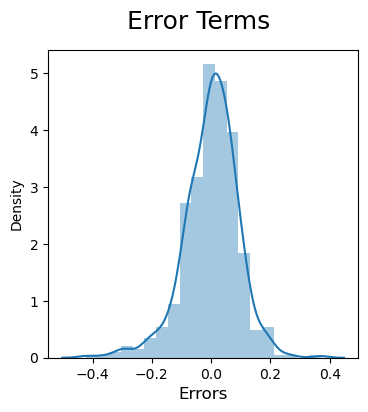

In [1056]:
fig = plt.figure(figsize=(4,4))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 18) 
plt.xlabel('Errors', fontsize = 12)
plt.show()

- Error terms are following normal distribution

### Multicolinearity

In [1078]:
calVIF(X_train[col])

,Features,VIF
2,temp,4.61
3,windspeed,4.00
0,yr,2.06
4,spring,1.64
9,mist,1.52
5,winter,1.39
6,july,1.35
7,sep,1.20
8,light_rain,1.08
1,holiday,1.04


- No multicolinearity exists

### Checking Linearity 

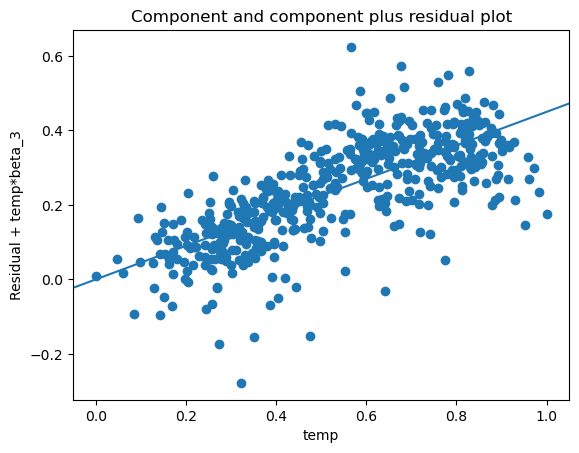

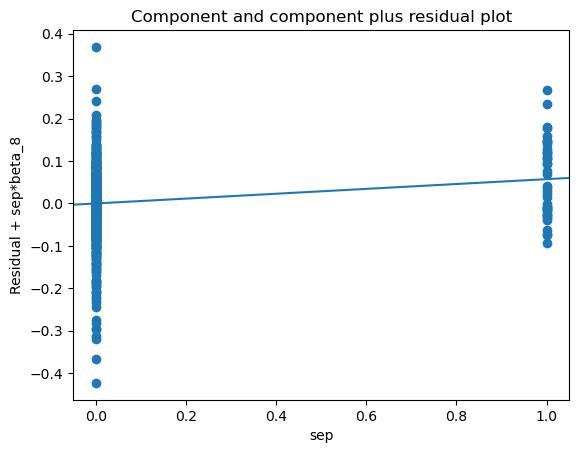

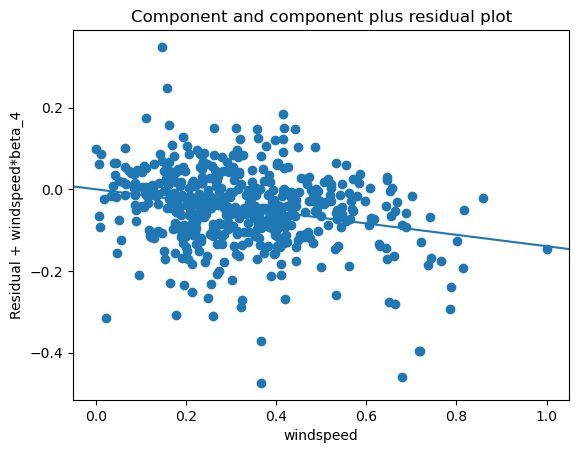

In [1084]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

#### Linearity is observed from above graphs

### Homoscedasticity testing

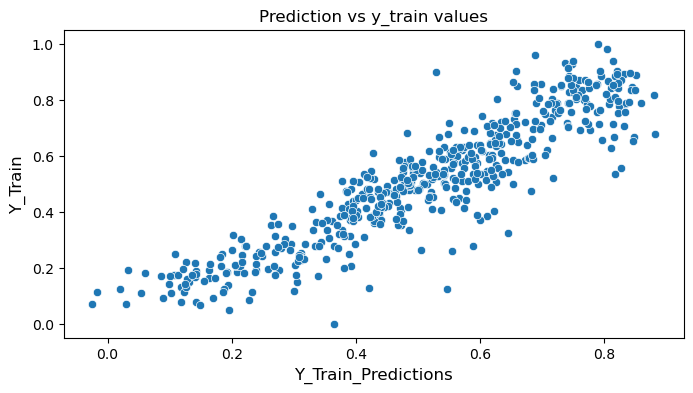

In [1090]:
#describing residuals
residuals = y_train - y_train_pred

#plotting residuals against predicted values
plt.figure(figsize=(8,4))

sns.scatterplot(y=y_train, x= y_train_pred, palette = "Blues")
plt.title("Prediction vs y_train values")
plt.ylabel("y_train".title(),fontsize = 12)
plt.xlabel("y_train_predictions".title(),fontsize = 12)
plt.show()


- Constant variance of predictions is observed
- Errors here are validating the assumption of Homoscedasticity

### Testing for correlation between Error terms

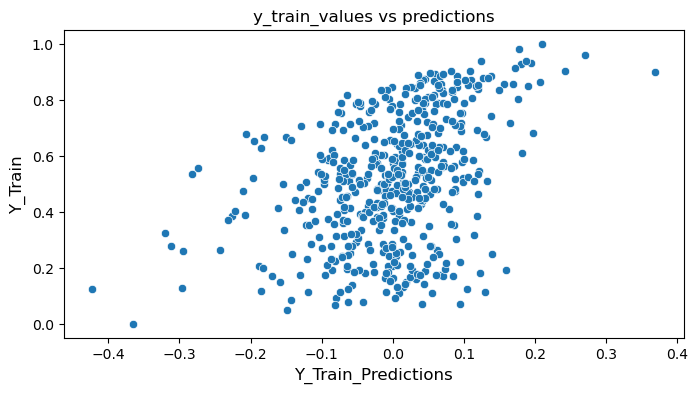

In [1058]:
#describing residuals
residuals = y_train - y_train_pred
#plotting residuals against predicted values
plt.figure(figsize=(8,4))

sns.scatterplot(y=y_train, x= residuals, palette = "Blues")
plt.title("y_train_values vs predictions")
plt.ylabel("y_train".title(),fontsize = 12)
plt.xlabel("y_train_predictions".title(),fontsize = 12)
plt.show()


- Their is no correlation between error terms.
- Durbin-Watson value of final lr model is 2.02, also signifies there is no autocorrelation.



TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

## Making predictions

In [1059]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
#Fit and transform training set only
bikes_test[num_vars] = scaler.fit_transform(bikes_test[num_vars])
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


In [1060]:
bikes_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1061]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1062]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [1063]:
X_test.shape

(220, 29)

In [1064]:
y_test.shape

(220,)

In [1067]:
col1 = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'july', 'sep', 'light_rain', 'mist']

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)
y_pred = lr_6.predict(X_test_lm_6)

In [1068]:
#Rsquare
r2 = r2_score(y_test,y_pred)
round(r2,4)

0.7949

### Evaluating model

Text(0, 0.5, 'y_pred')

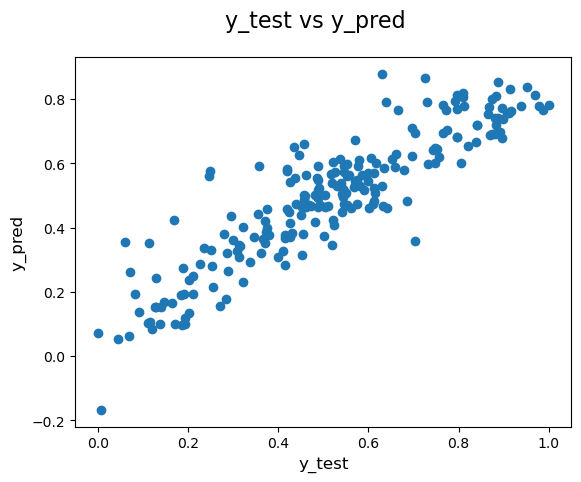

In [1077]:
#
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16) 
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_pred', fontsize = 12) 


In [1071]:
round(lr_6.params,4)

const         0.2531
yr            0.2342
holiday      -0.0980
temp          0.4498
windspeed    -0.1395
spring       -0.1123
winter        0.0449
july         -0.0729
sep           0.0573
light_rain   -0.2855
mist         -0.0796
dtype: float64

#### Equation of our best fitted line is:
cnt = 0.2531+0.2342*yr-0.0980*holiday+0.4498*temp-0.1395*windspeed-0.1123*spring+0.0449*winter-0.0729*july+0.0573*sep-0.2855*light_rain-0.0796*mist

In [1072]:
#Calculating adjusted-R2
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7851


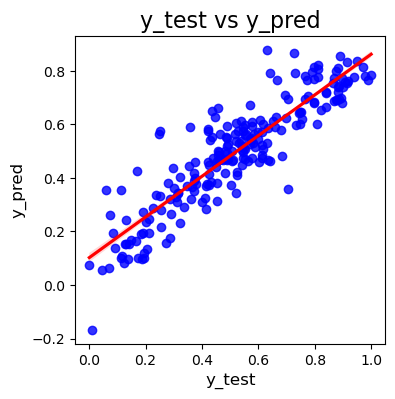

In [1075]:
# Visualizing the fit on the test data
# Regression plot

plt.figure(figsize=(4,4))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=16)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.832
    - Test dataset R^2           : 0.7949
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7851

#### Demand of boombikes depend on year, holiday, temp, windspeed, july, sep, light_rain, mist, spring, winter

### Since variation between train data prediction and test data prediction r2_score is less than 5%, model is giving significant output and enough to be generalized.

### Final Equation

#### cnt(Demand) = 0.2531+0.2342*yr-0.0980*holiday+0.4498*temp-0.1395*windspeed-0.1123*spring+0.0449*winter-0.0729*july+0.0573*sep-0.2855*light_rain-0.0796*mist

#### Important notes
- Coefficents of yr, temp, winter, sep are positive (Will put positively affect on demand when increment in this features will be done
- Coefficents of holiday, windspeed, spring, july, light_raint, mist are negative
- Constant is 0.2531. that is if all other variables are kept 0 still demand will be 0.2531
- Features having Negative coefficents should be optimized by putting more focus on features having positive coefficient.